In [ ]:
"""
Code for CEE6755 Final Project
Tomas Schmieder
"""

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import os

# a lot of this code is redunant and is just copied and pasted into different blocks for my test cases, i apologize for it being relatively misorganized
# most of what it does is runs the .i files, the .i files make a lot of csv files over 6000, which are then parsed through, combined, and eventually graphed
# as well from the combined csv files it makes the average and maximum values of things such as pressure and displacement are taken and put into an csv file
# for the 1e-16 case, i honestly don't uderstand why it exhibits such abnormal behavior, i tried to run it with a reduced timestep of 0.05, which ended up creating 120,000 csv files which were then combined and still got the same results,

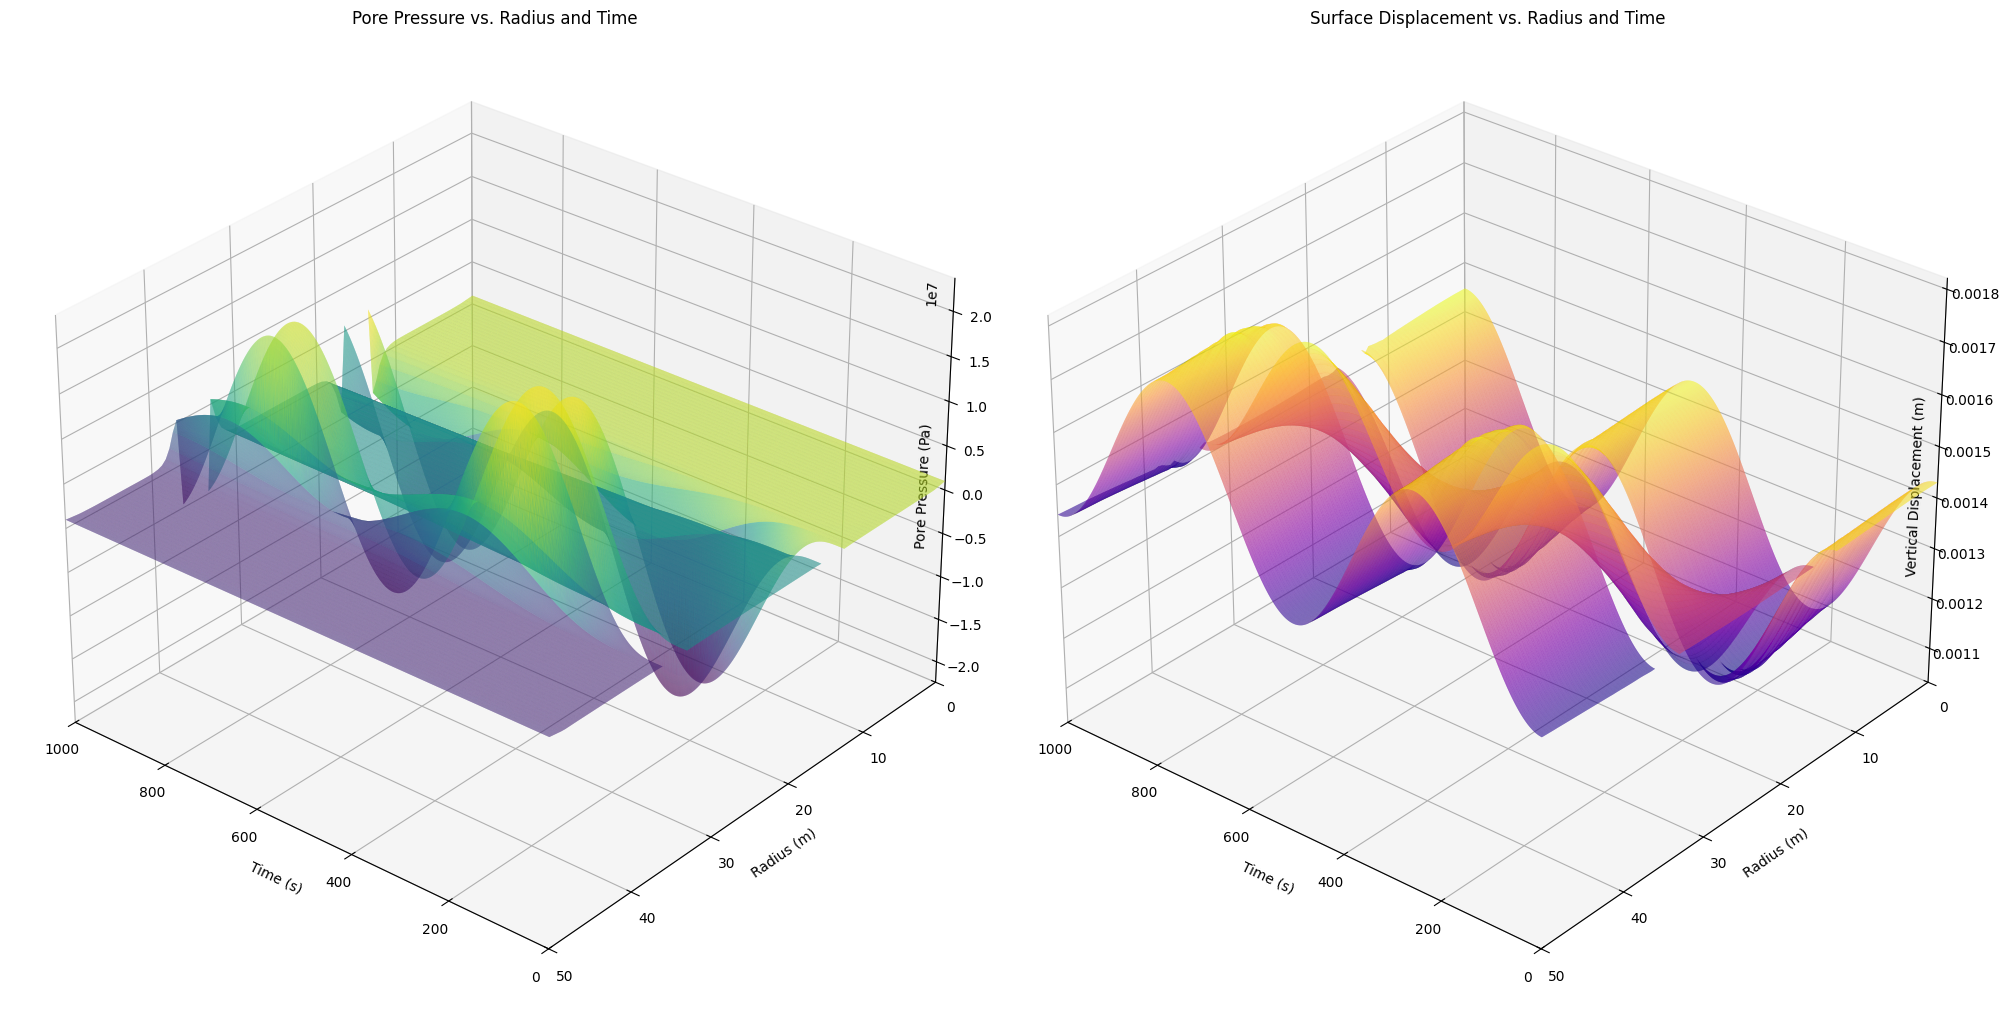

In [5]:
csv_dir = "/Users/windy/projects/borehole1/CYCLE-FILES-low_silt"
regions = ["left", "middle", "right"]

total_number_steps = 2000       # total number of steps
dt = 0.5                        # dt
end_time = 1000                 # end time


for region in regions:
    pressure_combined = []
    for i in range(1, total_number_steps):
        timestep = f"{i:04d}"
        p_file = os.path.join(csv_dir, f"output_pressure_{region}_{timestep}.csv")
        if os.path.exists(p_file):
            df = pd.read_csv(p_file)
            df["timestep"] = i
            pressure_combined.append(df[["timestep", "x", "porepressure"]])
    if pressure_combined:
        final_pressure_df = pd.concat(pressure_combined, ignore_index=True)
        final_pressure_df.to_csv(os.path.join(csv_dir, f"combined_pressure_{region}.csv"), index=False)

    displacement_combined = []
    for i in range(1, total_number_steps):
        timestep = f"{i:04d}"
        d_file = os.path.join(csv_dir, f"output_disp_{region}_{timestep}.csv")
        if os.path.exists(d_file):
            df = pd.read_csv(d_file)
            df["timestep"] = i
            displacement_combined.append(df[["timestep", "x", "disp_y"]])
    if displacement_combined:
        final_disp_df = pd.concat(displacement_combined, ignore_index=True)
        final_disp_df.to_csv(os.path.join(csv_dir, f"combined_disp_{region}.csv"), index=False)



csv_dir = "/Users/windy/projects/borehole1/CYCLE-FILES-low_silt"

pressure_data = []
for region in ["left", "middle", "right"]:
    df = pd.read_csv(f"{csv_dir}/combined_pressure_{region}.csv")
    df["time"] = df["timestep"] * dt
    df["region"] = region
    pressure_data.append(df)
pressure_df = pd.concat(pressure_data)

disp_data = []
for region in ["left", "middle", "right"]:
    df = pd.read_csv(f"{csv_dir}/combined_disp_{region}.csv")
    df["time"] = df["timestep"] * dt
    df["region"] = region
    disp_data.append(df)
disp_df = pd.concat(disp_data)
fig = plt.figure(figsize=(20, 10))


ax1 = fig.add_subplot(1, 2, 1, projection='3d')
for region in ["left", "middle", "right"]:
    sub_df = pressure_df[pressure_df["region"] == region]
    ax1.plot_trisurf(sub_df["time"], sub_df["x"], sub_df["porepressure"], cmap='viridis', linewidth=0.1, alpha=0.8)
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Radius (m)")
ax1.set_zlabel("Pore Pressure (Pa)", labelpad=-30)
ax1.set_title("Pore Pressure vs. Radius and Time")
ax1.set_xlim(0, end_time)
ax1.set_ylim(0, 50)
ax1.view_init(elev=30, azim=130)


ax2 = fig.add_subplot(1, 2, 2, projection='3d')
for region in ["left", "middle", "right"]:
    sub_df = disp_df[disp_df["region"] == region]
    ax2.plot_trisurf(sub_df["time"], sub_df["x"], sub_df["disp_y"], cmap='plasma', linewidth=0.1, alpha=0.8)
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Radius (m)")
ax2.set_zlabel("Vertical Displacement (m)", labelpad=-30)
ax2.set_title("Surface Displacement vs. Radius and Time")
ax2.set_xlim(0, end_time)
ax2.set_ylim(0, 50)
ax2.view_init(elev=30, azim=130)

plt.tight_layout()
plt.show()


In [ ]:
root_dir = "/Users/windy/projects/borehole1"
plot_dir = "/Users/windy/projects/borehole1/Plotting Folder"
os.makedirs(plot_dir, exist_ok=True)
cycle_folders = [f for f in os.listdir(root_dir) if f.startswith("CYCLE-FILES-")]
regions = ["left", "middle", "right"]
total_number_steps = 2000
dt = 0.5
end_time = 1000

for folder in cycle_folders:
    csv_dir = os.path.join(root_dir, folder)
    label = folder.replace("CYCLE-FILES-", "")
    input_file_path = os.path.join(root_dir, f"cycle1_{label}.i")
    permeability_tensor = "N/A"
    if os.path.exists(input_file_path):
        with open(input_file_path, "r") as f:
            for line in f:
                if "permeability = " in line:
                    permeability_tensor = line.strip().split("=", 1)[1].strip().strip("'")
                    break

    pressure_data, disp_data = [], []

    for region in regions:
        pressure_combined = []
        for i in range(1, total_number_steps):
            timestep = f"{i:04d}"
            p_file = os.path.join(csv_dir, f"output_pressure_{region}_{timestep}.csv")
            if os.path.exists(p_file):
                df = pd.read_csv(p_file)
                df["timestep"] = i
                pressure_combined.append(df[["timestep", "x", "porepressure"]])
        if pressure_combined:
            final_df = pd.concat(pressure_combined, ignore_index=True)
            final_df["time"] = final_df["timestep"] * dt
            final_df["region"] = region
            pressure_data.append(final_df)

        displacement_combined = []
        for i in range(1, total_number_steps):
            timestep = f"{i:04d}"
            d_file = os.path.join(csv_dir, f"output_disp_{region}_{timestep}.csv")
            if os.path.exists(d_file):
                df = pd.read_csv(d_file)
                df["timestep"] = i
                displacement_combined.append(df[["timestep", "x", "disp_y"]])
        if displacement_combined:
            final_df = pd.concat(displacement_combined, ignore_index=True)
            final_df["time"] = final_df["timestep"] * dt
            final_df["region"] = region
            disp_data.append(final_df)

    if not pressure_data or not disp_data:
        print(f"Skipping {folder} — no data found.")
        continue

    pressure_df = pd.concat(pressure_data)
    disp_df = pd.concat(disp_data)


    fig = plt.figure(figsize=(20, 10))

    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    for region in regions:
        sub_df = pressure_df[pressure_df["region"] == region]
        ax1.plot_trisurf(sub_df["time"], sub_df["x"], sub_df["porepressure"], cmap='viridis', linewidth=0.1, alpha=0.8)
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("Radius (m)")
    ax1.set_zlabel("Pore Pressure (Pa)", labelpad=-30)
    ax1.set_title(f"Pore Pressure vs. Radius vs. Time\nPermeability: {permeability_tensor}")
    ax1.set_xlim(0, end_time)
    ax1.set_ylim(0, 50)
    ax1.view_init(elev=30, azim=130)

    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    for region in regions:
        sub_df = disp_df[disp_df["region"] == region]
        ax2.plot_trisurf(sub_df["time"], sub_df["x"], sub_df["disp_y"], cmap='plasma', linewidth=0.1, alpha=0.8)
    ax2.set_xlabel("Time (s)")
    ax2.set_ylabel("Radius (m)")
    ax2.set_zlabel("Vertical Displacement (m)", labelpad=-30)
    ax2.set_title(f"Surface Displacement vs. Radius vs. Time\nPermeability: {permeability_tensor}")
    ax2.set_xlim(0, end_time)
    ax2.set_ylim(0, 50)
    ax2.view_init(elev=30, azim=130)

    plot_filename = os.path.join(plot_dir, f"plot_{label}.png")
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.close()
    print(f"Saved plot to {plot_filename}")

Saved plot to /Users/windy/projects/borehole1/Plotting Folder/plot_y_blocked.png


In [ ]:
cycle_folders = []
summary_rows = []
for folder in cycle_folders:
    csv_dir = os.path.join(root_dir, folder)
    label = folder.replace("CYCLE-FILES-", "")
    input_file_path = os.path.join(root_dir, f"cycle1_{label}.i")
    permeability_tensor = "N/A"
    if os.path.exists(input_file_path):
        with open(input_file_path, "r") as f:
            for line in f:
                if "permeability = " in line:
                    permeability_tensor = line.strip().split("=", 1)[1].strip().strip("'")
                    break

    pressure_values = []
    displacement_values = []

    for region in regions:
        for i in range(1, total_number_steps):
            timestep = f"{i:04d}"
            p_file = os.path.join(csv_dir, f"output_pressure_{region}_{timestep}.csv")
            d_file = os.path.join(csv_dir, f"output_disp_{region}_{timestep}.csv")

            if os.path.exists(p_file):
                df = pd.read_csv(p_file)
                pressure_values.extend(df["porepressure"].values)

            if os.path.exists(d_file):
                df = pd.read_csv(d_file)
                displacement_values.append(df["disp_y"].max())

    if pressure_values and displacement_values:
        summary_rows.append({
            "Case": label,
            "Permeability Tensor": permeability_tensor,
            "Max Pressure (Pa)": np.max(pressure_values),
            "Min Pressure (Pa)": np.min(pressure_values),
            "Average Pressure (Pa)": np.mean(pressure_values),
            "Max Surface Displacement (m)": np.max(displacement_values),
            "Min Surface Displacement (m)": np.min(displacement_values),
            "Average Surface Displacement (m)": np.mean(displacement_values)
        })

summary_df = pd.DataFrame(summary_rows)
summary_df.to_csv(os.path.join(plot_dir, "permeability_summary.csv"), index=False)
print("Saved permeability_summary.csv to:", plot_dir)


Saved permeability_summary.csv to: /Users/windy/projects/borehole1/Plotting Folder


In [ ]:
csv_dir = "/Users/windy/projects/borehole1/CYCLE-FILES-dt0.5"
plot_dir = "/Users/windy/projects/borehole1/Plotting Folder/Plotting Folder New"
os.makedirs(plot_dir, exist_ok=True)

regions = ["left", "middle", "right"]
total_number_steps = 20000

label = "dt0.5"
root_dir = "/Users/windy/projects/borehole1"
input_file_path = "/Users/windy/projects/borehole1/cycle2_very_low_clay.i"

# Extract permeability tensor
permeability_tensor = "N/A"
if os.path.exists(input_file_path):
    with open(input_file_path, "r") as f:
        for line in f:
            if "permeability = " in line:
                permeability_tensor = line.strip().split("=", 1)[1].strip().strip("'")
                break

# Gather pressure and surface displacement values
pressure_values = []
displacement_values = []

for region in regions:
    for i in range(1, total_number_steps):
        timestep = f"{i:04d}"
        p_file = os.path.join(csv_dir, f"output_pressure_{region}_{timestep}.csv")
        d_file = os.path.join(csv_dir, f"output_disp_{region}_{timestep}.csv")

        if os.path.exists(p_file):
            df = pd.read_csv(p_file)
            pressure_values.extend(df["porepressure"].values)

        if os.path.exists(d_file):
            df = pd.read_csv(d_file)
            displacement_values.append(df["disp_y"].max())

# Build summary table
summary_rows = []
if pressure_values and displacement_values:
    summary_rows.append({
        "Case": label,
        "Permeability Tensor": permeability_tensor,
        "Max Pressure (Pa)": np.max(pressure_values),
        "Min Pressure (Pa)": np.min(pressure_values),
        "Average Pressure (Pa)": np.mean(pressure_values),
        "Max Surface Displacement (m)": np.max(displacement_values),
        "Min Surface Displacement (m)": np.min(displacement_values),
        "Average Surface Displacement (m)": np.mean(displacement_values)
    })

# Save to CSV
summary_df = pd.DataFrame(summary_rows)
summary_df.to_csv(os.path.join(plot_dir, "permeability_summary0.5.csv"), index=False)
print("Saved permeability_summary0.5.csv to:", plot_dir)


Saved permeability_summary0.5.csv to: /Users/windy/projects/borehole1/Plotting Folder/Plotting Folder New


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Root and plot directories
root_dir = "/Users/windy/projects/borehole1"
plot_dir = "/Users/windy/projects/borehole1/Plotting Folder/Plotting Folder New"
os.makedirs(plot_dir, exist_ok=True)

# Only these two folders
cycle_folders = ["CYCLE-FILES-anisotropic_x_high"]
regions = ["left", "middle", "right"]
total_number_steps = 2000
dt = 0.5
end_time = 1000

for folder in cycle_folders:
    csv_dir = os.path.join(root_dir, folder)
    label = folder.replace("CYCLE-FILES-", "")
    input_file_path = os.path.join(root_dir, f"cycle1_{label}.i")

    # Get permeability tensor from input file
    permeability_tensor = "N/A"
    if os.path.exists(input_file_path):
        with open(input_file_path, "r") as f:
            for line in f:
                if "permeability = " in line:
                    permeability_tensor = line.strip().split("=", 1)[1].strip().strip("'")
                    break

    pressure_data, disp_data = [], []

    for region in regions:
        pressure_combined = []
        for i in range(1, total_number_steps):
            timestep = f"{i:04d}"
            p_file = os.path.join(csv_dir, f"output_pressure_{region}_{timestep}.csv")
            if os.path.exists(p_file):
                df = pd.read_csv(p_file)
                df["timestep"] = i
                pressure_combined.append(df[["timestep", "x", "porepressure"]])
        if pressure_combined:
            final_df = pd.concat(pressure_combined, ignore_index=True)
            final_df["time"] = final_df["timestep"] * dt
            final_df["region"] = region
            final_df = final_df.groupby("x").apply(lambda group: group.iloc[10:]).reset_index(drop=True)  # Skip first 10 rows per x
            pressure_data.append(final_df)

        displacement_combined = []
        for i in range(1, total_number_steps):
            timestep = f"{i:04d}"
            d_file = os.path.join(csv_dir, f"output_disp_{region}_{timestep}.csv")
            if os.path.exists(d_file):
                df = pd.read_csv(d_file)
                df["timestep"] = i
                displacement_combined.append(df[["timestep", "x", "disp_y"]])
        if displacement_combined:
            final_df = pd.concat(displacement_combined, ignore_index=True)
            final_df["time"] = final_df["timestep"] * dt
            final_df["region"] = region
            final_df = final_df.groupby("x").apply(lambda group: group.iloc[10:]).reset_index(drop=True)  # Skip first 10 rows per x
            disp_data.append(final_df)

    if not pressure_data or not disp_data:
        print(f"Skipping {folder} — no data found.")
        continue

    pressure_df = pd.concat(pressure_data)
    disp_df = pd.concat(disp_data)

    # Create plot
    fig = plt.figure(figsize=(20, 10))

    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    for region in regions:
        sub_df = pressure_df[pressure_df["region"] == region]
        ax1.plot_trisurf(sub_df["time"], sub_df["x"], sub_df["porepressure"], cmap='viridis', linewidth=0.1, alpha=0.8)
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("Radius (m)")
    ax1.set_zlabel("Pore Pressure (Pa)", labelpad=-30)
    ax1.set_title(f"Pore Pressure vs. Radius vs. Time\nPermeability: {permeability_tensor}")
    ax1.set_xlim(0, end_time)
    ax1.set_ylim(0, 50)
    ax1.view_init(elev=30, azim=130)

    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    for region in regions:
        sub_df = disp_df[disp_df["region"] == region]
        ax2.plot_trisurf(sub_df["time"], sub_df["x"], sub_df["disp_y"], cmap='plasma', linewidth=0.1, alpha=0.8)
    ax2.set_xlabel("Time (s)")
    ax2.set_ylabel("Radius (m)")
    ax2.set_zlabel("Vertical Displacement (m)", labelpad=-30)
    ax2.set_title(f"Surface Displacement vs. Radius vs. Time\nPermeability: {permeability_tensor}")
    ax2.set_xlim(0, end_time)
    ax2.set_ylim(0, 50)
    ax2.view_init(elev=30, azim=130)

    plot_filename = os.path.join(plot_dir, f"plot_{label}.png")
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.close()
    print(f"Saved plot to {plot_filename}")

    # === Print statistics ===
    max_pressure = pressure_df["porepressure"].max()
    avg_pressure = pressure_df["porepressure"].mean()
    max_disp = disp_df["disp_y"].max()
    avg_disp = disp_df["disp_y"].mean()

    print(f"\n=== Statistics for {label} ===")
    print(f"Max Pressure: {max_pressure} Pa")
    print(f"Avg Pressure: {avg_pressure} Pa")
    print(f"Max Surface Displacement: {max_disp} m")
    print(f"Avg Surface Displacement: {avg_disp} m\n")


/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_8698/3162378495.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = final_df.groupby("x").apply(lambda group: group.iloc[10:]).reset_index(drop=True)  # Skip first 10 rows per x
/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_8698/3162378495.py:62: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = final_df.groupby("x").

Saved plot to /Users/windy/projects/borehole1/Plotting Folder/Plotting Folder New/plot_anisotropic_x_high.png

=== Statistics for anisotropic_x_high ===
Max Pressure: 1003673.4562383 Pa
Avg Pressure: 999999.9545084877 Pa
Max Surface Displacement: 0.0018578763549668 m
Avg Surface Displacement: 0.00185471672477934 m



/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/244167149.py:75: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = final_df.groupby("x").apply(lambda group: group.iloc[3:]).reset_index(drop=True)
/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/244167149.py:90: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = final_df.groupby("x").apply(lambda group: group.ilo


=== Statistics for anisotropic_x_high ===
Max Pressure: 1.00e+06 Pa
Avg Pressure: 1.00e+06 Pa
Max Surface Displacement: 1.86e-03 m
Avg Surface Displacement: 1.85e-03 m



/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/244167149.py:75: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = final_df.groupby("x").apply(lambda group: group.iloc[3:]).reset_index(drop=True)
/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/244167149.py:90: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = final_df.groupby("x").apply(lambda group: group.ilo


=== Statistics for anisotropic_y_high ===
Max Pressure: 1.21e+06 Pa
Avg Pressure: 8.51e+05 Pa
Max Surface Displacement: 1.94e-03 m
Avg Surface Displacement: 1.56e-03 m



/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/244167149.py:75: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = final_df.groupby("x").apply(lambda group: group.iloc[3:]).reset_index(drop=True)
/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/244167149.py:90: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = final_df.groupby("x").apply(lambda group: group.ilo


=== Statistics for y_blocked ===
Max Pressure: 3.75e+06 Pa
Avg Pressure: 9.30e+05 Pa
Max Surface Displacement: 2.03e-03 m
Avg Surface Displacement: 1.75e-03 m



/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/244167149.py:75: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = final_df.groupby("x").apply(lambda group: group.iloc[3:]).reset_index(drop=True)
/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/244167149.py:90: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = final_df.groupby("x").apply(lambda group: group.ilo


=== Statistics for cross_coupled ===
Max Pressure: 2.36e+06 Pa
Avg Pressure: 8.99e+05 Pa
Max Surface Displacement: 2.07e-03 m
Avg Surface Displacement: 1.66e-03 m



/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/244167149.py:75: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = final_df.groupby("x").apply(lambda group: group.iloc[3:]).reset_index(drop=True)
/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/244167149.py:90: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = final_df.groupby("x").apply(lambda group: group.ilo


=== Statistics for high_gravel ===
Max Pressure: 1.00e+06 Pa
Avg Pressure: 1.00e+06 Pa
Max Surface Displacement: 1.86e-03 m
Avg Surface Displacement: 1.85e-03 m



/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/244167149.py:75: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = final_df.groupby("x").apply(lambda group: group.iloc[3:]).reset_index(drop=True)
/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/244167149.py:90: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = final_df.groupby("x").apply(lambda group: group.ilo


=== Statistics for medium_sand ===
Max Pressure: 1.52e+06 Pa
Avg Pressure: 9.46e+05 Pa
Max Surface Displacement: 2.02e-03 m
Avg Surface Displacement: 1.75e-03 m



/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/244167149.py:75: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = final_df.groupby("x").apply(lambda group: group.iloc[3:]).reset_index(drop=True)
/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/244167149.py:90: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = final_df.groupby("x").apply(lambda group: group.ilo


=== Statistics for very_high_karst ===
Max Pressure: 1.00e+06 Pa
Avg Pressure: 1.00e+06 Pa
Max Surface Displacement: 1.86e-03 m
Avg Surface Displacement: 1.85e-03 m



/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/244167149.py:75: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = final_df.groupby("x").apply(lambda group: group.iloc[3:]).reset_index(drop=True)
/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/244167149.py:90: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = final_df.groupby("x").apply(lambda group: group.ilo


=== Statistics for very_low_clay ===
Max Pressure: 1.34e+06 Pa
Avg Pressure: 7.63e+05 Pa
Max Surface Displacement: 1.78e-03 m
Avg Surface Displacement: 1.40e-03 m

Saved comparison plots for pressure and displacement at t = 500 s.


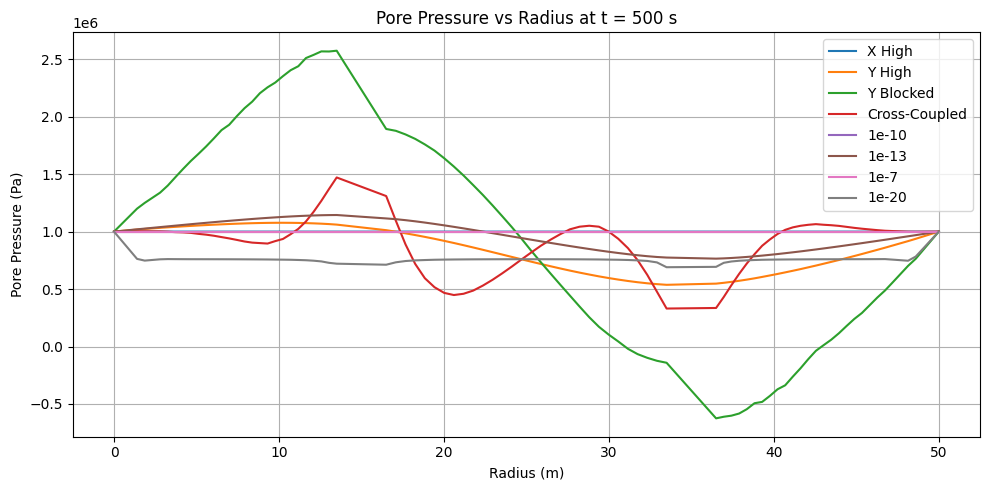

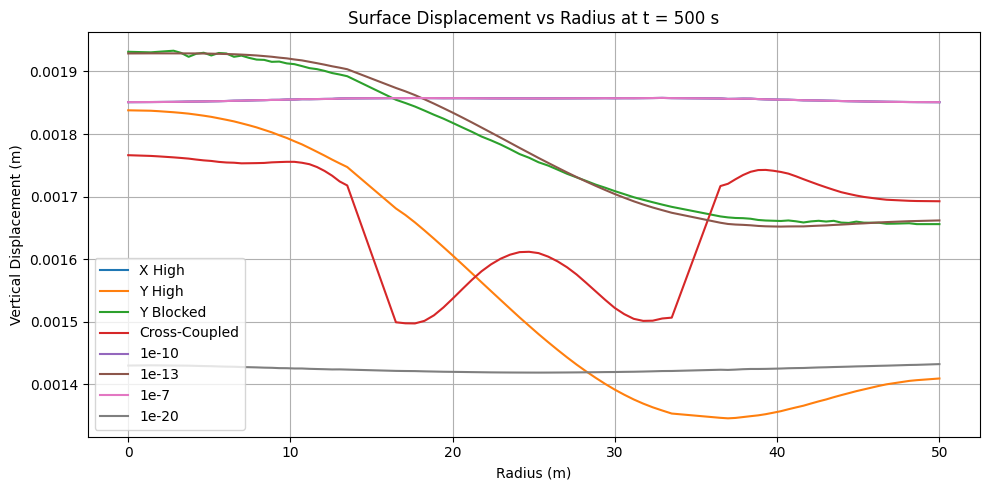

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Root and plot directories
root_dir = "/Users/windy/projects/borehole1"
plot_dir = "/Users/windy/projects/borehole1/Plotting Folder/Plotting Folder New"
os.makedirs(plot_dir, exist_ok=True)

# List of folders to compare
cycle_folders = [
    "CYCLE-FILES-anisotropic_x_high",
    "CYCLE-FILES-anisotropic_y_high",
    "CYCLE-FILES-y_blocked",
    "CYCLE-FILES-cross_coupled",
    "CYCLE-FILES-high_gravel",
    "CYCLE-FILES-medium_sand",
    "CYCLE-FILES-very_high_karst",
    "CYCLE-FILES-very_low_clay"
]

regions = ["left", "middle", "right"]
total_number_steps = 2000
dt = 0.5
end_time = 1000
target_time = 500
time_tol = dt / 2

# === Label mapping for prettier legends ===
label_map = {
    "anisotropic_x_high": "X High",
    "anisotropic_y_high": "Y High",
    "y_blocked": "Y Blocked",
    "cross_coupled": "Cross-Coupled",
    "high_gravel": "1e-10",
    "medium_sand": "1e-13",
    "very_high_karst": "1e-7",
    "very_low_clay": "1e-20"
}

# === Initialize comparison storage ===
pressure_profiles = []
displacement_profiles = []

for folder in cycle_folders:
    csv_dir = os.path.join(root_dir, folder)
    label = folder.replace("CYCLE-FILES-", "")
    input_file_path = os.path.join(root_dir, f"cycle1_{label}.i")

    # Get permeability tensor from input file
    permeability_tensor = "N/A"
    if os.path.exists(input_file_path):
        with open(input_file_path, "r") as f:
            for line in f:
                if "permeability = " in line:
                    permeability_tensor = line.strip().split("=", 1)[1].strip().strip("'")
                    break

    pressure_data, disp_data = [], []

    for region in regions:
        pressure_combined = []
        for i in range(1, total_number_steps):
            timestep = f"{i:04d}"
            p_file = os.path.join(csv_dir, f"output_pressure_{region}_{timestep}.csv")
            if os.path.exists(p_file):
                df = pd.read_csv(p_file)
                df["timestep"] = i
                pressure_combined.append(df[["timestep", "x", "porepressure"]])
        if pressure_combined:
            final_df = pd.concat(pressure_combined, ignore_index=True)
            final_df["time"] = final_df["timestep"] * dt
            final_df["region"] = region
            final_df = final_df.groupby("x").apply(lambda group: group.iloc[3:]).reset_index(drop=True)
            pressure_data.append(final_df)

        displacement_combined = []
        for i in range(1, total_number_steps):
            timestep = f"{i:04d}"
            d_file = os.path.join(csv_dir, f"output_disp_{region}_{timestep}.csv")
            if os.path.exists(d_file):
                df = pd.read_csv(d_file)
                df["timestep"] = i
                displacement_combined.append(df[["timestep", "x", "disp_y"]])
        if displacement_combined:
            final_df = pd.concat(displacement_combined, ignore_index=True)
            final_df["time"] = final_df["timestep"] * dt
            final_df["region"] = region
            final_df = final_df.groupby("x").apply(lambda group: group.iloc[3:]).reset_index(drop=True)
            disp_data.append(final_df)

    if not pressure_data or not disp_data:
        print(f"Skipping {folder} — no data found.")
        continue

    pressure_df = pd.concat(pressure_data)
    disp_df = pd.concat(disp_data)

    # === Extract data at t = 500 s ===
    pressure_500 = pressure_df[np.abs(pressure_df["time"] - target_time) < time_tol]
    disp_500 = disp_df[np.abs(disp_df["time"] - target_time) < time_tol]

    # === Average across regions for each radius (x) ===
    p_avg = pressure_500.groupby("x")["porepressure"].mean().reset_index()
    d_avg = disp_500.groupby("x")["disp_y"].mean().reset_index()
    p_avg["label"] = label
    d_avg["label"] = label

    pressure_profiles.append(p_avg)
    displacement_profiles.append(d_avg)

    # === Print statistics ===
    max_pressure = pressure_df["porepressure"].max()
    avg_pressure = pressure_df["porepressure"].mean()
    max_disp = disp_df["disp_y"].max()
    avg_disp = disp_df["disp_y"].mean()

    print(f"\n=== Statistics for {label} ===")
    print(f"Max Pressure: {max_pressure:.2e} Pa")
    print(f"Avg Pressure: {avg_pressure:.2e} Pa")
    print(f"Max Surface Displacement: {max_disp:.2e} m")
    print(f"Avg Surface Displacement: {avg_disp:.2e} m\n")

# === Plot comparison: Pressure vs Radius at t = 500 s ===
plt.figure(figsize=(10, 5))
for df in pressure_profiles:
    label = df["label"].iloc[0]
    pretty_label = label_map.get(label, label)
    plt.plot(df["x"], df["porepressure"], label=pretty_label)
plt.xlabel("Radius (m)")
plt.ylabel("Pore Pressure (Pa)")
plt.title("Pore Pressure vs Radius at t = 500 s")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "comparison_pressure_t500.png"), dpi=300)

# === Plot comparison: Displacement vs Radius at t = 500 s ===
plt.figure(figsize=(10, 5))
for df in displacement_profiles:
    label = df["label"].iloc[0]
    pretty_label = label_map.get(label, label)
    plt.plot(df["x"], df["disp_y"], label=pretty_label)
plt.xlabel("Radius (m)")
plt.ylabel("Vertical Displacement (m)")
plt.title("Surface Displacement vs Radius at t = 500 s")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "comparison_displacement_t500.png"), dpi=300)

print("Saved comparison plots for pressure and displacement at t = 500 s.")


/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/3589411463.py:76: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = grouped.apply(lambda group: group.iloc[10:] if len(group) > 10 else group).reset_index(drop=True)
/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/3589411463.py:94: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = grouped.apply(lambda group: grou


=== X High ===
Permeability: 1E-10 0 0   0 1E-15 0   0 0 0
Max Pressure: 1.00e+06 Pa | Avg Pressure: 1.00e+06 Pa
Max Displacement: 1.86e-03 m | Avg Displacement: 1.85e-03 m



/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/3589411463.py:76: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = grouped.apply(lambda group: group.iloc[10:] if len(group) > 10 else group).reset_index(drop=True)
/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/3589411463.py:94: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = grouped.apply(lambda group: grou


=== Y High ===
Permeability: 1E-15 0 0   0 1E-10 0   0 0 1E-00
Max Pressure: 1.21e+06 Pa | Avg Pressure: 8.51e+05 Pa
Max Displacement: 1.94e-03 m | Avg Displacement: 1.56e-03 m



/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/3589411463.py:76: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = grouped.apply(lambda group: group.iloc[10:] if len(group) > 10 else group).reset_index(drop=True)
/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/3589411463.py:94: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = grouped.apply(lambda group: grou


=== Y Blocked ===
Permeability: 1E-13 0 0   0 1E-20 0   0 0 0
Max Pressure: 3.75e+06 Pa | Avg Pressure: 9.30e+05 Pa
Max Displacement: 2.03e-03 m | Avg Displacement: 1.75e-03 m



/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/3589411463.py:76: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = grouped.apply(lambda group: group.iloc[10:] if len(group) > 10 else group).reset_index(drop=True)
/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/3589411463.py:94: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = grouped.apply(lambda group: grou


=== Cross-Coupled ===
Permeability: 1E-13 1E-13 0   1E-13 1E-13 0   0 0 0
Max Pressure: 2.36e+06 Pa | Avg Pressure: 8.99e+05 Pa
Max Displacement: 2.07e-03 m | Avg Displacement: 1.66e-03 m



/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/3589411463.py:76: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = grouped.apply(lambda group: group.iloc[10:] if len(group) > 10 else group).reset_index(drop=True)
/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/3589411463.py:94: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = grouped.apply(lambda group: grou


=== 1e-10 ===
Permeability: 1E-10 0 0   0 1E-10 0   0 0 0
Max Pressure: 1.00e+06 Pa | Avg Pressure: 1.00e+06 Pa
Max Displacement: 1.86e-03 m | Avg Displacement: 1.85e-03 m



/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/3589411463.py:76: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = grouped.apply(lambda group: group.iloc[10:] if len(group) > 10 else group).reset_index(drop=True)
/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/3589411463.py:94: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = grouped.apply(lambda group: grou


=== 1e-13 ===
Permeability: 1E-13 0 0   0 1E-13 0   0 0 0
Max Pressure: 1.52e+06 Pa | Avg Pressure: 9.46e+05 Pa
Max Displacement: 2.02e-03 m | Avg Displacement: 1.75e-03 m



/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/3589411463.py:76: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = grouped.apply(lambda group: group.iloc[10:] if len(group) > 10 else group).reset_index(drop=True)
/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/3589411463.py:94: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = grouped.apply(lambda group: grou


=== 1e-7 ===
Permeability: 1E-7  0 0   0 1E-7  0   0 0 0
Max Pressure: 1.00e+06 Pa | Avg Pressure: 1.00e+06 Pa
Max Displacement: 1.86e-03 m | Avg Displacement: 1.85e-03 m



/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/3589411463.py:76: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = grouped.apply(lambda group: group.iloc[10:] if len(group) > 10 else group).reset_index(drop=True)
/var/folders/pb/7rf69v5s2jjf1zthdkdq36rh0000gn/T/ipykernel_35436/3589411463.py:94: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = grouped.apply(lambda group: grou


=== 1e-20 ===
Permeability: 1E-20 0 0   0 1E-20 0   0 0 0
Max Pressure: 1.34e+06 Pa | Avg Pressure: 7.63e+05 Pa
Max Displacement: 1.78e-03 m | Avg Displacement: 1.40e-03 m

Plotting pressure: X High
Plotting pressure: Y High
Plotting pressure: Y Blocked
Plotting pressure: Cross-Coupled
Plotting pressure: 1e-10
Plotting pressure: 1e-13
Plotting pressure: 1e-7
Plotting pressure: 1e-20
Plotting displacement: X High
Plotting displacement: Y High
Plotting displacement: Y Blocked
Plotting displacement: Cross-Coupled
Plotting displacement: 1e-10
Plotting displacement: 1e-13
Plotting displacement: 1e-7
Plotting displacement: 1e-20
✅ Saved comparison plots for pressure and displacement at t = 500 s.


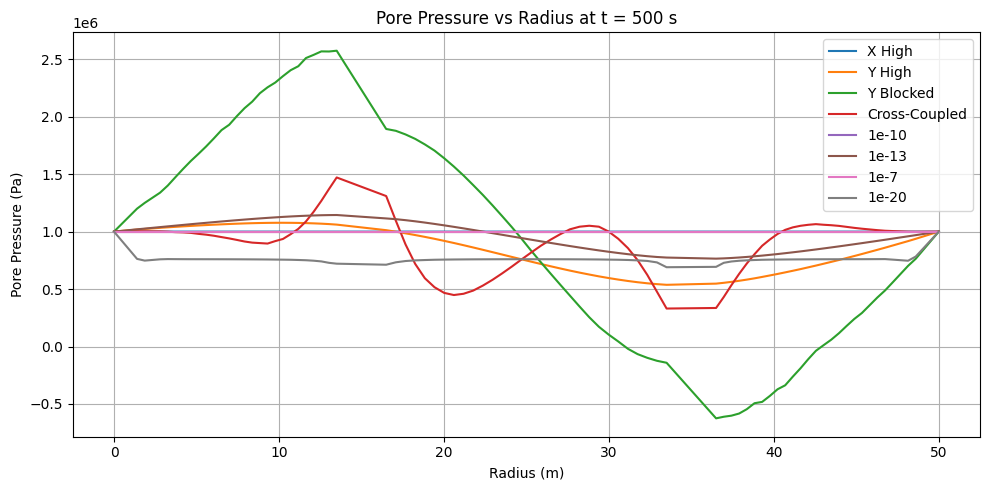

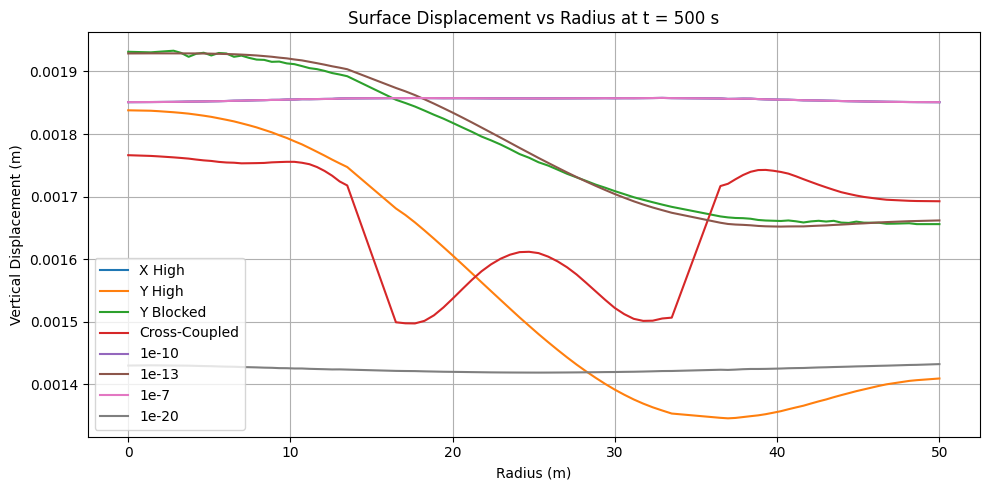

In [ ]:
root_dir = "/Users/windy/projects/borehole1"
plot_dir = os.path.join(root_dir, "Plotting Folder", "Plotting Folder New")
os.makedirs(plot_dir, exist_ok=True)

cycle_folders = [
    "CYCLE-FILES-anisotropic_x_high",
    "CYCLE-FILES-anisotropic_y_high",
    "CYCLE-FILES-y_blocked",
    "CYCLE-FILES-cross_coupled",
    "CYCLE-FILES-high_gravel",
    "CYCLE-FILES-medium_sand",
    "CYCLE-FILES-very_high_karst",
    "CYCLE-FILES-very_low_clay"
]

regions = ["left", "middle", "right"]
total_number_steps = 2000
dt = 0.5
end_time = 1000
target_time = 500
time_tol = dt / 2
label_map = {
    "anisotropic_x_high": "X High",
    "anisotropic_y_high": "Y High",
    "y_blocked": "Y Blocked",
    "cross_coupled": "Cross-Coupled",
    "high_gravel": "1e-10",
    "medium_sand": "1e-13",
    "very_high_karst": "1e-7",
    "very_low_clay": "1e-20"
}

pressure_profiles = []
displacement_profiles = []

for folder in cycle_folders:
    csv_dir = os.path.join(root_dir, folder)
    label = folder.replace("CYCLE-FILES-", "")
    input_file_path = os.path.join(root_dir, f"cycle1_{label}.i")
    permeability_tensor = "N/A"
    if os.path.exists(input_file_path):
        with open(input_file_path, "r") as f:
            for line in f:
                if "permeability = " in line:
                    permeability_tensor = line.strip().split("=", 1)[1].strip().strip("'")
                    break

    pressure_data, disp_data = [], []

    for region in regions:
        pressure_combined = []
        for i in range(1, total_number_steps):
            timestep = f"{i:04d}"
            p_file = os.path.join(csv_dir, f"output_pressure_{region}_{timestep}.csv")
            if os.path.exists(p_file):
                df = pd.read_csv(p_file)
                df["timestep"] = i
                pressure_combined.append(df[["timestep", "x", "porepressure"]])
        if pressure_combined:
            final_df = pd.concat(pressure_combined, ignore_index=True)
            final_df["time"] = final_df["timestep"] * dt
            final_df["region"] = region
            grouped = final_df.groupby("x")
            final_df = grouped.apply(lambda group: group.iloc[10:] if len(group) > 10 else group).reset_index(drop=True)
            pressure_data.append(final_df)
        else:
            print(f"[Warning] No pressure files found for {folder}, region {region}")

        displacement_combined = []
        for i in range(1, total_number_steps):
            timestep = f"{i:04d}"
            d_file = os.path.join(csv_dir, f"output_disp_{region}_{timestep}.csv")
            if os.path.exists(d_file):
                df = pd.read_csv(d_file)
                df["timestep"] = i
                displacement_combined.append(df[["timestep", "x", "disp_y"]])
        if displacement_combined:
            final_df = pd.concat(displacement_combined, ignore_index=True)
            final_df["time"] = final_df["timestep"] * dt
            final_df["region"] = region
            grouped = final_df.groupby("x")
            final_df = grouped.apply(lambda group: group.iloc[10:] if len(group) > 10 else group).reset_index(drop=True)
            disp_data.append(final_df)
        else:
            print(f"[Warning] No displacement files found for {folder}, region {region}")
    if not pressure_data or not disp_data:
        print(f"[Skipping] {folder}: No data loaded.")
        continue

    pressure_df = pd.concat(pressure_data)
    disp_df = pd.concat(disp_data)
    pressure_500 = pressure_df[np.abs(pressure_df["time"] - target_time) < time_tol]
    disp_500 = disp_df[np.abs(disp_df["time"] - target_time) < time_tol]
    if pressure_500.empty or disp_500.empty:
        print(f"[Skipping] {label}: No data found at t = {target_time}s.")
        continue

    p_avg = pressure_500.groupby("x")["porepressure"].mean().reset_index()
    d_avg = disp_500.groupby("x")["disp_y"].mean().reset_index()
    p_avg["label"] = label
    d_avg["label"] = label
    pressure_profiles.append(p_avg)
    displacement_profiles.append(d_avg)
    max_pressure = pressure_df["porepressure"].max()
    avg_pressure = pressure_df["porepressure"].mean()
    max_disp = disp_df["disp_y"].max()
    avg_disp = disp_df["disp_y"].mean()

    print(f"\n=== {label_map.get(label, label)} ===")
    print(f"Permeability: {permeability_tensor}")
    print(f"Max Pressure: {max_pressure:.2e} Pa | Avg Pressure: {avg_pressure:.2e} Pa")
    print(f"Max Displacement: {max_disp:.2e} m | Avg Displacement: {avg_disp:.2e} m\n")


plt.figure(figsize=(10, 5))
for df in pressure_profiles:
    label = df["label"].iloc[0]
    pretty_label = label_map.get(label, label)
    print(f"Plotting pressure: {pretty_label}")
    plt.plot(df["x"], df["porepressure"], label=pretty_label)
plt.xlabel("Radius (m)")
plt.ylabel("Pore Pressure (Pa)")
plt.title("Pore Pressure vs Radius at t = 500 s")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "comparison_pressure_t500.png"), dpi=300)


plt.figure(figsize=(10, 5))
for df in displacement_profiles:
    label = df["label"].iloc[0]
    pretty_label = label_map.get(label, label)
    print(f"Plotting displacement: {pretty_label}")
    plt.plot(df["x"], df["disp_y"], label=pretty_label)
plt.xlabel("Radius (m)")
plt.ylabel("Vertical Displacement (m)")
plt.title("Surface Displacement vs Radius at t = 500 s")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "comparison_displacement_t500.png"), dpi=300)

print("Saved comparison plots for pressure and displacement at t = 500 s.")
